In [1]:
# You may add additional imports here
import random
import matplotlib.pyplot as plt
import csv

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [2]:
#PARS scoring system
def game(ra, rb):
    player_a, player_b = 0, 0
    while True:
        #Using formula given:
        if random.random() < ra / (ra + rb):
            player_a += 1
        else:
            player_b += 1

        # Check for game end conditions
        if player_a >= 11 and player_a >= player_b + 2:
            return player_a, player_b
        elif player_b >= 11 and player_b >= player_a + 2:
            return player_a, player_b

**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [3]:
random.seed(57)
print(game(70, 30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [4]:
def win_probability_game(ra, rb, simulations):
    points = 0
    
    for x in range(simulations):
        # Simulate a game using PARS scoring
        anwser = game(ra, rb)
        if anwser[0] > anwser[1]:
            points += 1
    # Calculate the win probability
    probability = points / simulations
    return probability

**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [5]:
# Print win_probability_game(70, 30) to 2 decimal places for a suitable value of n:
random.seed(57)
print(round(win_probability_game(70, 30, 1000), 2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [24]:
def read_ability(filepath):
    abilities_list = []
    with open(filepath, 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)

        for row in csv_reader:
            abilities_list.append((int(row[0]), int(row[1])))

    return abilities_list

**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [25]:
# Print the result of calling the function for the file `test.csv`
fileName= 'test.csv'
csvFileRead = read_ability(fileName)
print(csvFileRead)

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]


**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [8]:
def plot_win_probabilities(abilities_list): # HINT: what should the argument be?
    y_axis, x_axis = [], []
    for abilities in abilities_list:
        
        y_axis.append(win_probability_game(abilities[0], abilities[1], 10000))
        x_axis.append(abilities[0]/abilities[1])
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_axis, y_axis, marker='o', color='b')
    plt.xlabel('ra/rb')
    plt.ylabel('Probability a wins')
    plt.axis([0 , 3 , 0, 1])
    # Display the plot
    plt.grid(True)
    plt.show()



**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


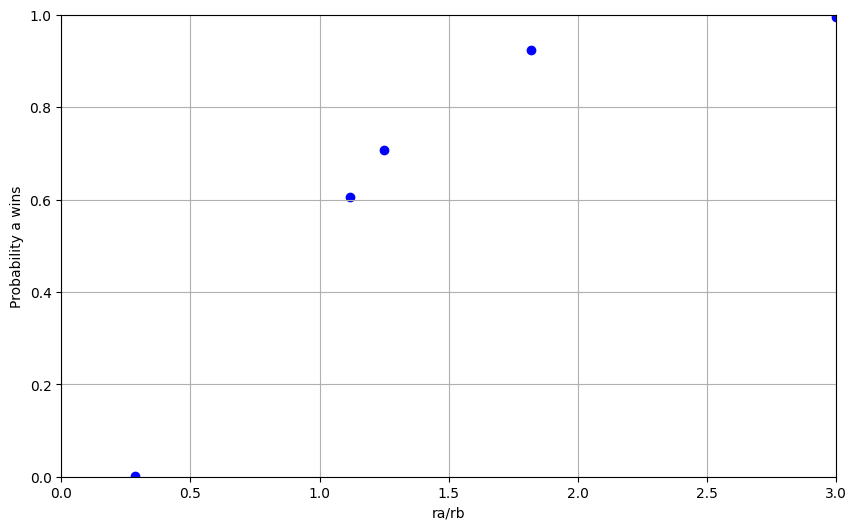

In [9]:
# Call the function to plot the figure here
fileName = 'test.csv' 
abilities_list = read_ability(fileName)
plot_win_probabilities(abilities_list)

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [17]:
def win_probability_match(ra, rb, simulations, m):
    a_wins, b_wins = 0, 0
    for x in range(simulations):
        result = match(ra, rb, m)
        a_score = result[0]
        b_score = result[1]
        if a_score > b_score:
            a_wins += 1

    return (a_wins / simulations)



def match(ra, rb, m):
    a_wins, b_wins = 0, 0
    while a_wins < m and b_wins < m:
        result = game(ra, rb)
        a_wins += result[0] > result[1]
        b_wins += result[0] < result[1]
    return a_wins, b_wins

##Input values of ra, rb, simulations and m
ra = 60
rb = 40 
simulations = 10000 
m = 0
while win_probability_match(ra, rb, simulations, m) <= 0.9:
    m +=1
print(f"The smallest value of m (number of matches) is: {m}")
    

The smallest value of m (number of matches) is: 2


Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

## Problem

The Objective of this investigation is to evulate and compare the effectivness of the two scoring methods; English and PARS through their use in squash matches. We will be measuring which method gives the more fair scoring and representation of the players ability, which ensures the better player to usually win and should expect to see shorter matches because of this

## Method

I will be conducting a fair number of simulatons for both English and PARS scoring method. I will be doing this by using two players with varying relative abilities (ra/rb).
I will cover atleast 50 different values of ra/rb to ensure a thorough evaultion of the players abilities, and for each simulation, the winner of the round will be recorded, aswell as this, I will be measuring the how many matches is played before a player has won, as a shorter match can mean a more enjoyable match.

## Assumptions

We are assuming each rally in a match takes up an equal amount of time, which will be used to provide a basis for estimating the duration of a match.
For the English scoring system, we are assuming that if they score 8-8, there is a coin toss to decide wether the score goes to 9 or 10 (heads is 9, tails is 10)

## Results

After coding the English scoring system and comparing it to the PARS system, we can see from the graph shown below, that a match using the PARS system is on average shorter, especially when the relative abilities of both players is 1. This means, that since shorter matches are generally prefered, the PARS system giving a shorter match would be more enjoyable to watch

(Red is Pars, Blue is English)



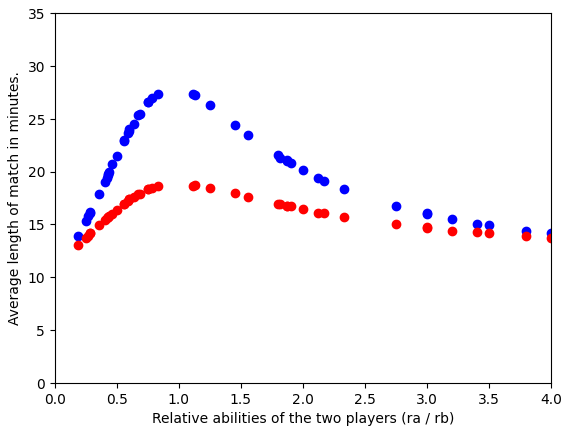

## Conclusions

To conclude, I believe both scoring systems can be used in very different ways, and there is no clear "winner" for one being "better". The english scoring system can be used more in toruments, where its more about the players abilities, as can be seen in the graph, the higher the abilities of the two players are (ra/rb) creates a lower average length of match, making it more enjoyable for viewers.
The Pars system would be more helpful and used better for more local games, with a group of friends, or low tier toruments, where the viewer numbers arent as high and therefore dont have much of an inclusion in the result. This can also be seen in the PARS graph above where the lower (ra/rb) create a shorter match, and arent as strongly based upon the abilities as there isnt as much of a curve


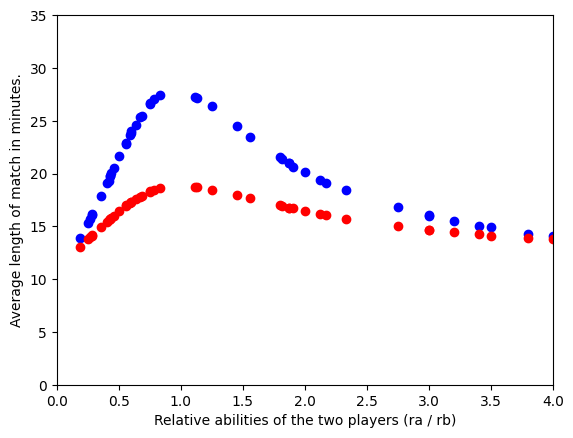

In [23]:
def listTuples(myfile): 
	data = []
	with open(myfile, 'r') as file: 
			csv_reader = csv.reader(file)
			next(csv_reader)#skips first rows
			for row in csv_reader:
				data.append((int(row[0]), int(row[1]))) 
	return data 

#English scoring system
def english_Game(ra, rb): 
	server = 'A'
	player_a, player_b, rallies = 0, 0, 0
	winPoint = 9
	gameOver = False
	while gameOver == False:
		probability = random.random() 
		if probability < ra / (ra + rb):
			if  server == 'A': 
				player_a += 1
			else:
				server = 'A'
		else:
			if server == 'B': 
				player_b += 1
			else:
				server = 'B'
		if player_a == 8 and player_b == 8: 
			if probability < 0.5: 
				winPoint = 10
		rallies += 1
		reached_winPoint = (player_a == winPoint) or (player_b == winPoint)
		if reached_winPoint:
			gameOver = True
	return player_a, player_b, rallies


def win_english_game(ra, rb, simulations):
    a = 0 
    for x in range(0, simulations):
        anwser = english_Game(ra, rb)
        if anwser[0] > anwser[1]:
            a += 1

    # Calculate the win probability
    probability = a / simulations
    return probability

def engGameRallies(ra, rb, n):
	ralliesE = 0
	for matches in range(0, n):
		temp = english_Game(ra, rb)[2]
		ralliesE += temp
	ralliesE = round((ralliesE/n),2)
	return ralliesE

def parsGameRallies(ra, rb, n):
      ralliesP = 0
      for matches in range(n):
            pointsA, pointsB = game(ra, rb)
            ralliesP += (pointsA + pointsB)
      ralliesP = round((ralliesP / n),2) 
      return ralliesP

def scoringGraph():
	engRallies=list()
	parsRallies=list()
	RA=list()
	playerRange = listTuples('extraSimulations.csv')
	for i in playerRange: 
		engRallies.append(engGameRallies(i[0], i[1], 10000))
		parsRallies.append(parsGameRallies(i[0], i[1], 10000)) 
		RA.append(i[0] / i[1])
	plt.scatter(RA, engRallies, marker='o', color='b')
	plt.scatter(RA, parsRallies, marker='o', color='r')
	plt.axis([0,4,0,35])
	plt.xlabel('Relative abilities of the two players (ra / rb)')
	plt.ylabel('Average length of match in minutes.')
	plt.show()

scoringGraph()